In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
data_dir = '/content/drive/My Drive/LSTM'

In [ ]:
tomato_classes = ['Tomato leaf', 'Tomato mold leaf','Tomato leaf late blight','Tomato leaf yellow virus','Tomato leaf mosaic virus','Tomato leaf bacterial spot','Tomato Early blight leaf','Tomato leaf yellow virus'] ; accuracy = 0.7153

In [ ]:
train_tomato = train_labels[train_labels['class'].isin(tomato_classes)]
test_tomato = test_labels[test_labels['class'].isin(tomato_classes)]

Class distribution before undersampling:
 class
Tomato leaf yellow virus      787
Tomato leaf                   369
Tomato mold leaf              277
Tomato leaf bacterial spot    266
Tomato leaf mosaic virus      225
Tomato leaf late blight       207
Tomato Early blight leaf      195
Name: count, dtype: int64


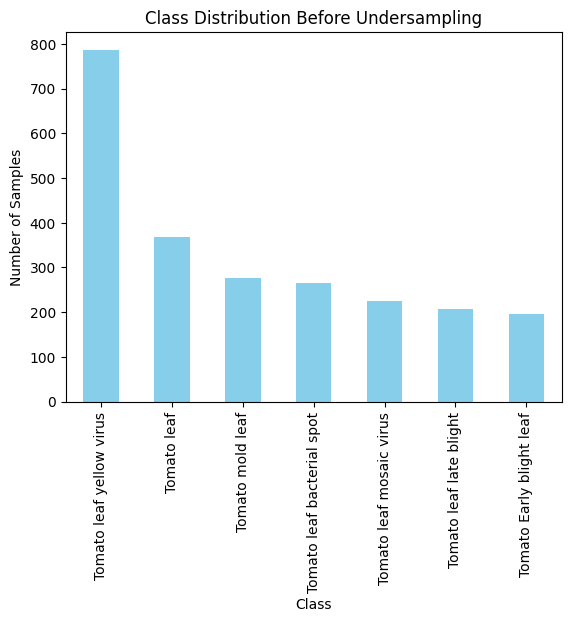

In [ ]:
class_counts = train_tomato['class'].value_counts()
print("Class distribution before undersampling:\n", class_counts)

class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
min_class_size = class_counts.min()

In [ ]:
df_majority_list = [train_tomato[train_tomato['class'] == class_] for class_ in class_counts.index]

In [ ]:
df_majority_downsampled_list = [
    resample(df_majority,
             replace=False,
             n_samples=min_class_size,
             random_state=42)
    for df_majority in df_majority_list
]

In [ ]:
train_balanced = pd.concat(df_majority_downsampled_list)

In [ ]:
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_class_counts = train_balanced['class'].value_counts()
print("Class distribution after undersampling:\n", balanced_class_counts)

Class distribution after undersampling:
 class
Tomato leaf late blight       195
Tomato leaf mosaic virus      195
Tomato leaf                   195
Tomato mold leaf              195
Tomato leaf bacterial spot    195
Tomato leaf yellow virus      195
Tomato Early blight leaf      195
Name: count, dtype: int64


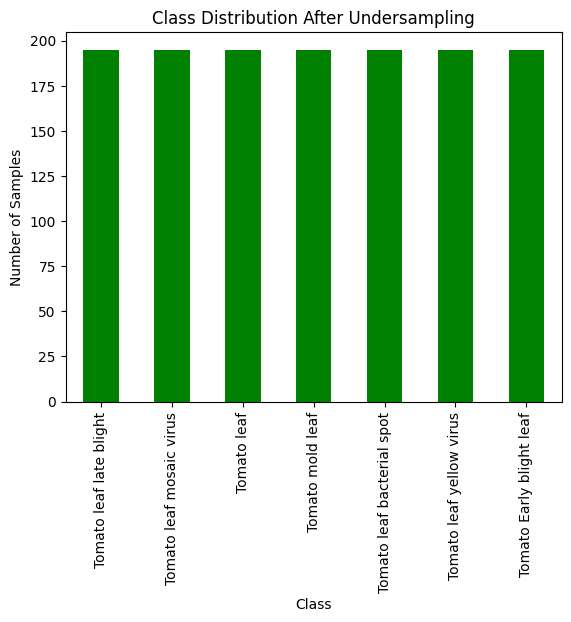

In [ ]:
balanced_class_counts.plot(kind='bar', color='green')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
features = ['width', 'height',]

In [ ]:
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_tomato[features])

In [ ]:
test_features_scaled = scaler.transform(test_tomato[features])

In [ ]:
train_features_reshaped = train_features_scaled.reshape((train_features_scaled.shape[0], 1, train_features_scaled.shape[1]))
test_features_reshaped = test_features_scaled.reshape((test_features_scaled.shape[0], 1, test_features_scaled.shape[1]))

In [ ]:
class_mapping = {label: idx for idx, label in enumerate(tomato_classes)}
train_labels_encoded = train_tomato['class'].map(class_mapping).values
test_labels_encoded = test_tomato['class'].map(class_mapping).values

In [ ]:
train_labels_categorical = to_categorical(train_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(256, input_shape=(1, 6), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(tomato_classes), activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

opt = Adam(learning_rate=1e-4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_features_reshaped, train_labels_categorical, epochs=20, validation_data=(test_features_reshaped, test_labels_categorical))

In [ ]:
test_predictions = model.predict(test_features_reshaped)
test_predictions_labels = np.argmax(test_predictions, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [ ]:
acuracy = accuracy_score(test_labels_encoded, test_predictions_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f'Acc: {accuracy:.4f}')

Accuracy: 0.7153
